In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [4]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [5]:
all_matches = matches[((matches['team1'] == 'Royal Challengers Bangalore') & (matches['team2'] == 'Kolkata Knight Riders')) | ((matches['team2'] == 'Royal Challengers Bangalore') & (matches['team1'] == 'Kolkata Knight Riders'))]

In [6]:
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')

In [7]:
sub_data = data[((data['team1'] == 'Royal Challengers Bangalore') & (data['team2'] == 'Kolkata Knight Riders')) | ((data['team2'] == 'Royal Challengers Bangalore') & (data['team1'] == 'Kolkata Knight Riders'))]

In [8]:
sub_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6254,27,2017,Kolkata,4/23/2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6255,27,2017,Kolkata,4/23/2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6256,27,2017,Kolkata,4/23/2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6257,27,2017,Kolkata,4/23/2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
6258,27,2017,Kolkata,4/23/2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [9]:
all_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
26,27,2017,Kolkata,4/23/2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
44,45,2017,Bangalore,5/7/2017,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN
59,60,2008,Bangalore,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
87,88,2008,Kolkata,5/8/2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,SC Ganguly,Eden Gardens,Asad Rauf,IL Howell,NaN
133,134,2009,Durban,4/29/2009,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Kingsmead,MR Benson,TH Wijewardene,NaN


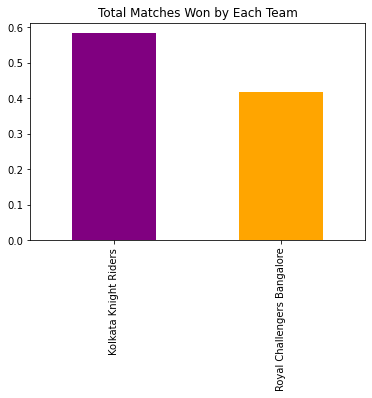

In [10]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title='Total Matches Won by Each Team', color = ['purple', 'orange'])

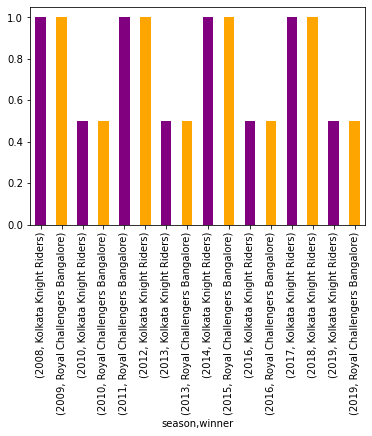

In [11]:
all_matches.groupby(['season'])['winner'].value_counts(normalize=True).plot.bar(color = ['purple', 'orange'])

In [12]:
print(all_matches.groupby(['winner'])['win_by_runs', 'win_by_wickets'].agg(['max']))

                            win_by_runs win_by_wickets
                                    max            max
winner                                                
Kolkata Knight Riders               140              7
Royal Challengers Bangalore          10              9


In [13]:
all_matches['city'].unique()

array(['Kolkata', 'Bangalore', 'Durban', 'Centurion', 'Ranchi', 'Sharjah',
       'Bengaluru'], dtype=object)

In [14]:
sub_data1 = all_matches[all_matches['city'].isin(['Durban', 'Centurion', 'Sharjah'])]

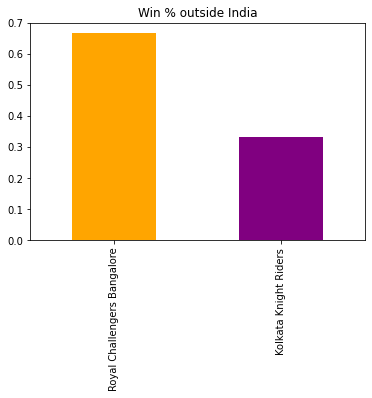

In [15]:
sub_data1['winner'].value_counts(normalize=True).plot.bar(title='Win % outside India', color = ['orange', 'purple'])

In [16]:
sub_data1[sub_data1['city'] == 'Sharjah']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
467,468,2014,Sharjah,4/24/2014,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium,Aleem Dar,VA Kulkarni,NaN


When match is being played in India Kolkata Knight Riders seems to have higher winning percentage but when we look outside India Royal Challengers Bangalore have higher winning %. Also, there was a played at the Sharjah cricket ground where KKR won by 2 runs which is not a big margin.

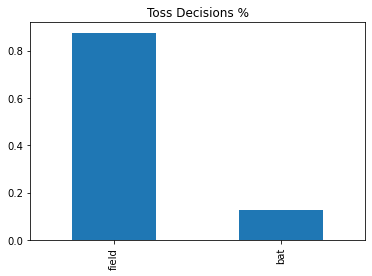

In [17]:
all_matches['toss_decision'].value_counts(normalize=True).plot.bar(title='Toss Decisions %')

In [18]:
all_matches['result'].value_counts()

normal    24
Name: result, dtype: int64

In [19]:
all_matches['toss_winner'].value_counts()

Royal Challengers Bangalore    13
Kolkata Knight Riders          11
Name: toss_winner, dtype: int64

In [44]:
all_matches.groupby(['toss_decision', 'toss_winner'])['winner'].value_counts(normalize =True)

toss_decision  toss_winner                  winner                     
bat            Kolkata Knight Riders        Kolkata Knight Riders          0.666667
                                            Royal Challengers Bangalore    0.333333
field          Kolkata Knight Riders        Kolkata Knight Riders          0.875000
                                            Royal Challengers Bangalore    0.125000
               Royal Challengers Bangalore  Royal Challengers Bangalore    0.615385
                                            Kolkata Knight Riders          0.384615
Name: winner, dtype: float64

It seems that the winning captain opts to field first and when chasing KKR have higher winning percentage.

In [21]:
sub_data2 = sub_data[sub_data['batsman'] == 'KD Karthik']

In [22]:
sub_data2.groupby(['season', 'match_id'])['batsman_runs'].sum()

season  match_id
2015    522          6
2018    7896        39
        7922        23
2019    11153       20
Name: batsman_runs, dtype: int64

In [23]:
print('Average runs scored by Dinesh Karthik against RCB is {}'.format(sub_data2.groupby(['season', 'match_id'])['batsman_runs'].sum().mean()))

Average runs scored by Dinesh Karthik against RCB is 22.0


In [24]:
sub_data3 = deliveries[((deliveries['batting_team'] == 'Royal Challengers Bangalore') & (deliveries['bowling_team'] == 'Kolkata Knight Riders')) | ((deliveries['bowling_team'] == 'Royal Challengers Bangalore') & (deliveries['batting_team'] == 'Kolkata Knight Riders'))]

In [25]:
sub_data3.shape

(5502, 21)

In [26]:
sub_data3 = sub_data3[sub_data3['noball_runs'] !=0]

In [27]:
sub_data3.groupby('match_id')['noball_runs'].agg(['count'])

,count
match_id,
27,2
88,1
156,4
178,1
258,1
344,1
392,3
468,1
506,2


In [28]:
round(sub_data[sub_data['noball_runs'] != 0].groupby(['season', 'match_id'])['noball_runs'].agg(['count']).mean())[0]

2.0

In [29]:
sub_data4 = sub_data[(sub_data['batsman'] == 'V Kohli') & (sub_data['batsman_runs'] == 4)]

In [43]:
sub_data4.groupby(['season', 'match_id'])['batsman_runs'].agg(['count'])

count
season match_id       
2009   134           1
2011   258           3
       291           2
2012   317           1
       344           3
2013   392           4
       441           2
2014   468           4
       506           3
2015   550           2
2016   606           4
       624           5
2018   7896          1
       7922          5
2019   11153         9
       11326         9

In [31]:
sub_data5 = sub_data[(sub_data['batsman'] == 'V Kohli') & (sub_data['batsman_runs'] == 4)].groupby(['match_id'])['batsman_runs'].sum()

In [32]:
sub_data6 = sub_data[(sub_data['batsman'] == 'V Kohli')].groupby(['match_id'])['batsman_runs'].sum()

In [33]:
sub_data7 = pd.merge(pd.DataFrame(sub_data6), pd.DataFrame(sub_data5), how = 'left', left_on = 'match_id', right_on = 'match_id')

In [34]:
sub_data7.head()

,batsman_runs_x,batsman_runs_y
match_id,,
27,0,NaN
45,5,NaN
60,1,NaN
134,19,4.0
178,2,NaN


In [35]:
sub_data7.rename(columns = {'batsman_runs_x' : 'Total_runs_scored', 'batsman_runs_y' : 'Runs_scored_boundary'}, inplace = True)

In [36]:
sub_data7.fillna(0, inplace = True)

In [37]:
sub_data7.columns

Index(['Total_runs_scored', 'Runs_scored_boundary'], dtype='object')

In [38]:
sub_data7['%_runs_boundary'] = round(sub_data7['Runs_scored_boundary'] / sub_data7['Total_runs_scored'], 2) * 100

In [39]:
sub_data7

,Total_runs_scored,Runs_scored_boundary,%_runs_boundary
match_id,,,
27,0,0.0,NaN
45,5,0.0,0.0
60,1,0.0,0.0
134,19,4.0,21.0
178,2,0.0,0.0
258,30,12.0,40.0
291,15,8.0,53.0
317,6,4.0,67.0
344,18,12.0,67.0


In [40]:
sub_data7['%_runs_boundary'].mean()

31.4